# Evolutionary multiobjective optimization

LEAP currently directly supports one form of multiobjective optimization, NSGA-II, but there is intent to implement other common evolutionary multiobjective algorithms.

## Naive evolutionary multiobjective optimization

A naive approach to evolutionary multiobjective optimization would be to simply sum up the fitnesses, biased by a weight, as a final, single fitness, $f(x)$:

$f(x) = \sum \limits_{i=0}^n w_i f_i$

Where $f_i$ is the fitness for objective _i_.

However, there isn't very satisfying because we have to decide on $w_i$, which we usually don't know. A better approach would be to evolve solutions along a Pareto front where each solution on the front dominates other solutions.

## NSGA-II

The NSGA-II algorithm is just one such evolutionary multiobjective optimization (MO) algorithm.

Deb, Kalyanmoy, Amrit Pratap, Sameer Agarwal, and T. A. M. T. Meyarivan.
"A Fast and Elitist Multiobjective Genetic Algorithm: NSGA-II." IEEE
transactions on evolutionary computation 6, no. 2 (2002): 182-197.


In [1]:
import sys
import pandas as pd

from leap_ec.representation import Representation
from leap_ec.ops import tournament_selection, clone, evaluate, pool
from leap_ec.real_rep.initializers import create_real_vector
from leap_ec.real_rep.ops import mutate_gaussian
from leap_ec.probe import print_individual
from leap_ec.global_vars import context

from leap_ec.multiobjective.nsga2 import generalized_nsga_2
from leap_ec.multiobjective.problems import SCHProblem

In [2]:
# These are smaller than the values used in original paper, but suffice for demonstration purposes.
POP_SIZE=50
MAX_GENERATIONS=100

We supply one of the benchmark functions, Schaffer's Study (that we refer to as the "SCHProblem"), used in Deb's original paper that uses a single gene from which we calculate two separate fitnesses.

$f_1(x) = x^2$

$f_2(x) = (x - 2)^2$

For which there are two optimal solutinos, $x \in [0,2]$

In [3]:
sch_problem = SCHProblem() # Schaffer's Study problem

In [4]:
# We're only going to do a narrow range, which is sufficient for demonstration purposes. The original
# NSGA-II paper explored a wider range.
sch_representation = Representation(initialize=create_real_vector(bounds=[(-10, 10)]))

In [5]:
def print_generation(population):
    """ Pipeline probe for echoing current generation """
    if context['leap']['generation'] % 10 == 0:
        print(f"generation: {context['leap']['generation']}")
    return population

In [6]:
pipeline = [tournament_selection, # uses domination comparison in MultiObjective.worse_than()
            clone, 
            mutate_gaussian(std=0.5, expected_num_mutations=1),
            evaluate,
#             print_individual, # only if you want to see every single new offspring
            pool(size=POP_SIZE),
            print_generation]

In [7]:
final_pop = generalized_nsga_2(max_generations=MAX_GENERATIONS, 
                   pop_size=POP_SIZE, 
                   problem=sch_problem, 
                   representation=sch_representation,
                   pipeline=pipeline)

generation: 0
generation: 10
generation: 20
generation: 30
generation: 40
generation: 50
generation: 60
generation: 70
generation: 80
generation: 90


In [8]:
df = pd.DataFrame([(x.genome[0], x.fitness[0], x.fitness[1], x.rank, x.distance) for x in final_pop])

In [9]:
df.columns = ['gene','f1','f2','rank','distance']

In [10]:
df

,gene,f1,f2,rank,distance
0,-0.000963,9.274655e-07,4.003853e+00,1,inf
1,1.999969,3.999877e+00,9.513017e-10,1,inf
2,1.735142,3.010716e+00,7.015002e-02,1,0.124404
3,0.156622,2.453058e-02,3.398041e+00,1,0.110577
4,1.662308,2.763269e+00,1.140357e-01,1,0.102609
5,1.813088,3.287288e+00,3.493609e-02,1,0.090139
6,0.082452,6.798286e-03,3.676991e+00,1,0.089490
7,1.581854,2.502262e+00,1.748461e-01,1,0.087632
8,0.393728,1.550219e-01,2.580109e+00,1,0.087608
9,0.193128,3.729842e-02,3.264786e+00,1,0.086746


## Visualization of Pareto front

By plotting the two fitnesses against each other we can see the Pareto front of solutions.

<AxesSubplot:xlabel='f1', ylabel='f2'>

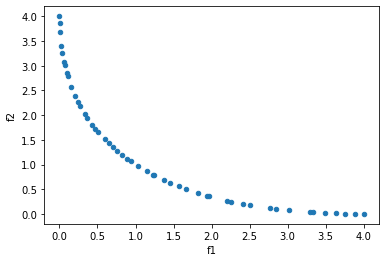

In [11]:
df.plot(x='f1',y='f2', kind='scatter')